In [49]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
train = pd.read_json('../data/train.json')
del train['id']

In [5]:
train.loc[train['inc_angle'] == "na", 'inc_angle'] = train[train['inc_angle'] != "na"]['inc_angle'].mean()

In [42]:
def get_data(band_1, band_2, angles):
    X_band_1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in band_1])
    X_band_2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in band_2])
    X_angles = np.asarray(angles).astype(np.float32)

    X_band_1_val = np.power(10, X_band_1 / 20.0)
    X_band_2_val = np.power(10, X_band_2 / 20.0)

    X_band_sqrmean = 20 * np.log10(np.sqrt(np.square(X_band_1_val) + np.square(X_band_2_val)))

    data = np.concatenate(
        [
            X_band_1[:, :, :, np.newaxis],
            X_band_2[:, :, :, np.newaxis],
            X_band_sqrmean[:, :, :, np.newaxis]
        ],
        axis=-1
    )

    return data

def color_composite(data):
    rgb_arrays = np.zeros(data.shape).astype(np.float32)
    for i, data_row in enumerate(data):
        band_1 = data_row[:,:,0]
        band_2 = data_row[:,:,1]
        band_3 = data_row[:,:,2]

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))

        rgb = np.dstack((r, g, b))
        rgb_arrays[i] = rgb
    return np.array(rgb_arrays)

In [45]:
X_train = get_data(train['band_1'].values, train['band_2'].values, train['inc_angle'].values)

In [46]:
X_train = color_composite(X_train)

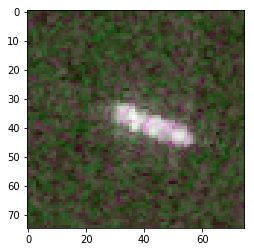

In [51]:
plt.imshow(X_train[100])